In [95]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
dataframe1 = pd.read_csv('./output_test.csv')

# 设置Matplotlib的字体参数
plt.rcParams['font.sans-serif'] = ['STSong']  # 使用宋体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题
# 解决不显示中文的方案


In [96]:
data_anlysis = dataframe1
data_anlysis['日期'] = pd.to_datetime(data_anlysis['日期'])
data_anlysis['Year'] = data_anlysis['日期'].dt.year
data_anlysis['Month'] =  data_anlysis['日期'].dt.month

# 将年份和月份转换为字符串格式，以便进行分组
data_anlysis['Year'] = data_anlysis['Year'].astype(str)
data_anlysis['Month'] = data_anlysis['Month'].astype(str)
grouped = data_anlysis.groupby(['Year', 'Month'])['通知人'].count().reset_index(name='Count')

grouped['Month'] = grouped['Month'].astype(int)
grouped['Month'] = pd.Categorical(grouped['Month'], categories=range(1, 13), ordered=True)

grouped


,Year,Month,Count
0,2003,1,1
1,2003,10,5
2,2003,11,2
3,2003,12,5
4,2003,2,1
...,...,...,...
250,2024,5,20
251,2024,6,26
252,2024,7,6
253,2024,8,12


In [97]:
# sns.lineplot(x="Month", y="Count",data=grouped)
# plt.xticks(range(1, 13))  # 设置X轴刻度为1到12
# plt.tight_layout()  # 调整布局以适应图例
# plt.show()


In [98]:
# grouped_1 = data_anlysis.groupby(['Month'])['通知人'].count().reset_index(name='Count')
# grouped_1

C:\Users\Slexy\AppData\Local\Temp\ipykernel_23308\2925426931.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 100)` for the same effect.

  sns.lineplot(x="Month", y="Count",data=grouped,ci=100,color='salmon',ls="--", lw=4,label = "average")


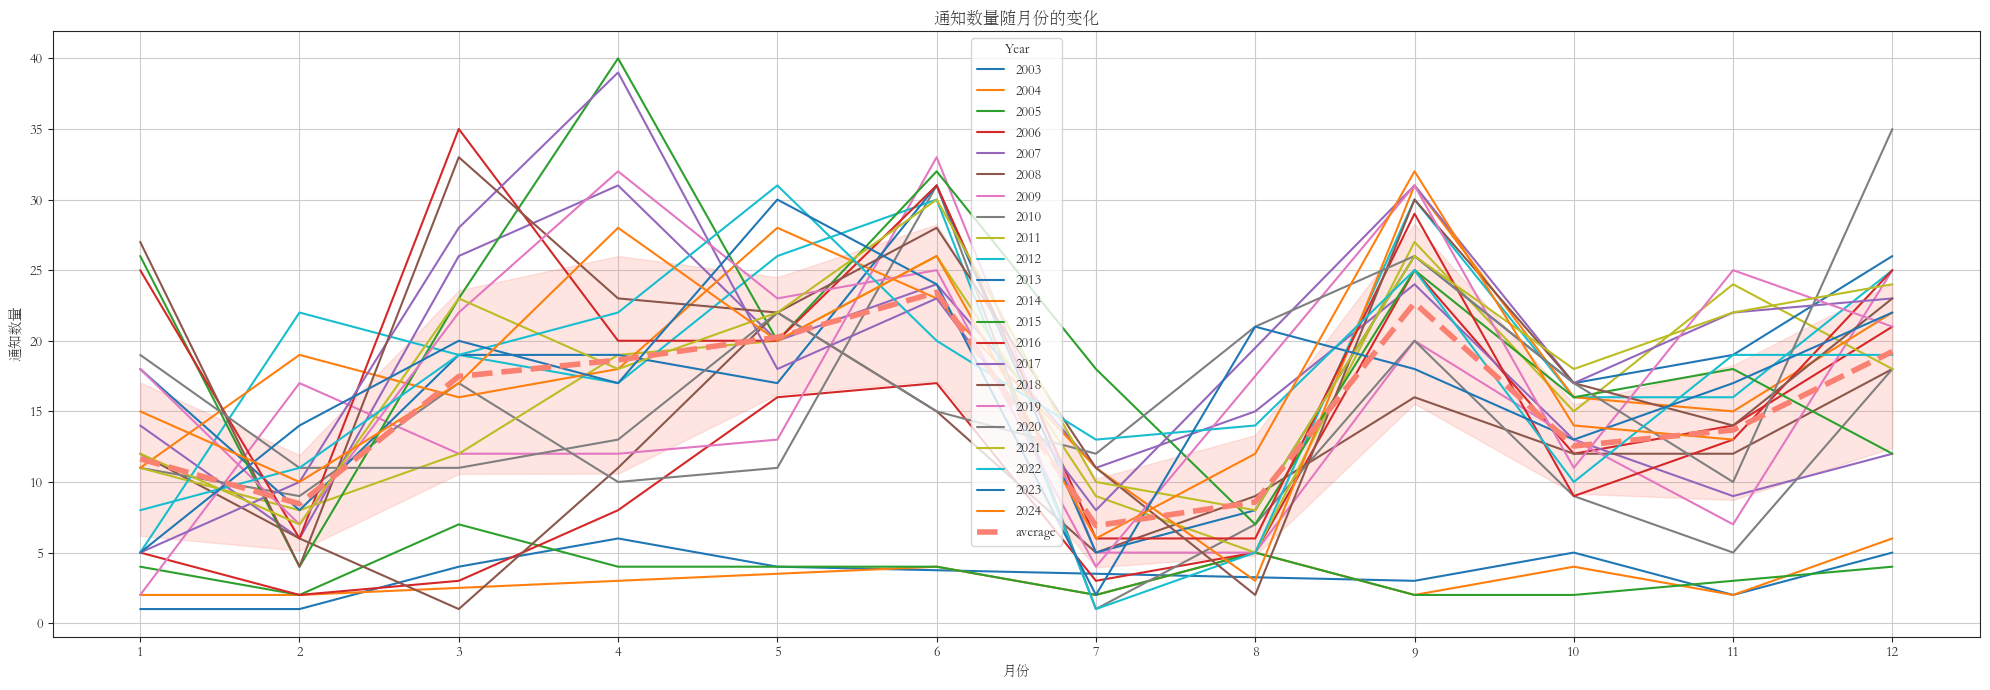

In [ ]:
# 绘制折线图
plt.figure(figsize=(20, 7))

# 为每年的数据绘制折线图
for year in grouped['Year'].unique():
    year_data = grouped[grouped['Year'] == year]
    sns.lineplot(data=year_data, x='Month', y='Count', label=year)
    
sns.lineplot(x="Month", y="Count",data=grouped,ci=100,color='salmon',ls="--", lw=4,label = "average")

# 设置图表标题和标签
plt.title('通知数量随月份的变化')
plt.xlabel('月份')
plt.ylabel('通知数量')
plt.xticks(range(1, 13))  # 设置X轴刻度为1到12
plt.legend(title='Year',loc='best')
plt.grid(True)
plt.tight_layout()  # 调整布局以适应图例
plt.show()